<h1> Manipulação de arquivos netCDF com Python</h1> <div align="right"> <h3>Network Common Data Form</h3> </div> <img src="https://www.unidata.ucar.edu/images/logos/netcdf-400x400.png" align="right">
<br>

### Autor: Vitor Galazzo

<br>

<h2>Conteúdo:</h2>
<h3>
&emsp;1. Instalando a biblioteca netCDF4<br><br>
&emsp;2. Cirando um arquivo netCDF<br><br>
&emsp;3. Arquitetura:
</h3><h4>
&emsp;&emsp;&emsp;- Grupos<br><br>
&emsp;&emsp;&emsp;- Dimensões<br><br>
&emsp;&emsp;&emsp;- Variáveis<br><br>
&emsp;&emsp;&emsp;- Atributos</h4>
<h3>&emsp;4. Escrevendo e recuperando dados</h3>

<br><br>
<hr style="background-color:gray;height:20px;">
<br><br>

## 1. Instalando a biblioteca netCDF4

<br>

### Terminal Linux ou conda prompt no Windows



conda install -c conda-forge netCDF4

<br>

<a href="http://unidata.github.io/netcdf4-python/"><h3> Documentação </h3></a>

<br>

<hr style="background-color:gray;height:20px;">

<br>

## 2. Criando um arquivo netCDF

### Importando bibliotecas

In [3]:
import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Criando arquivo

In [4]:
ncTest = nc.Dataset('Dropbox/aula_nc/ncTest.nc', 'w', format='NETCDF4')

In [1]:
ls Dropbox/aula_nc/*.nc


Dropbox/aula_nc/ncTest.nc


<br>
<hr style="background-color:gray;height:20px;">
<br>

## 3. Arquitetura
<br><br>
<h3>&emsp;&emsp;&emsp;&emsp;&emsp; netCDF Clássico &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   netCDF 4</h3>
<img src="https://www.unidata.ucar.edu/software/netcdf/papers/nc4_conventions_images/nc3-uml.png" style="height: 300px;" align="left">
<img src="https://www.unidata.ucar.edu/software/netcdf/papers/nc4_conventions_images/nc4-uml.png" style="height: 320px;" align="right">



<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<p style="font-size:130%;"> - <a href="https://www.unidata.ucar.edu/software/netcdf/conventions.html">Lista de Convensões</a> na geração de produtos no formato netCDF utilizadas pelos maiores distribuidores</p>

<br><br>

### &emsp;&emsp;&emsp;&emsp; - Grupos

In [4]:
grupo1 = ncTest.createGroup(u'grupo1')

print grupo1

<type 'netCDF4._netCDF4.Group'>
group /grupo1:
    dimensions(sizes): 
    variables(dimensions): 
    groups: 



In [5]:
grupo1a = ncTest.createGroup(u'grupo1/grupo1a')

print grupo1
print grupo1a

<type 'netCDF4._netCDF4.Group'>
group /grupo1:
    dimensions(sizes): 
    variables(dimensions): 
    groups: grupo1a

<type 'netCDF4._netCDF4.Group'>
group /grupo1/grupo1a:
    dimensions(sizes): 
    variables(dimensions): 
    groups: 



### &emsp;&emsp;&emsp;&emsp; - Dimenções

In [5]:
time = ncTest.createDimension('time', None)

lat = ncTest.createDimension('lat', 180)

lon = ncTest.createDimension('lon', 360)

#### Quando não estipulado o tamanho das dimenções elas são consideradas _ilimitadas_ podendo variar e aceitar o armazenamento de novos dados quando se desejar

In [7]:
ncTest.dimensions

OrderedDict([('time',
              <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0),
             ('lat',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180),
             ('lon',
              <type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360)])

### &emsp;&emsp;&emsp;&emsp; - Variáveis

#### &emsp;&emsp;&emsp;&emsp; Criadas definindo uma _key_ para ser acessada do arquivo, um tipo de arquivo (ex: 'i4' = inteiro de 32 bits) e as dimensões previamente definidas

In [6]:
times = ncTest.createVariable("time","i4",("time",))

lats = ncTest.createVariable("lat","f4",("lat",))

lons = ncTest.createVariable("lon","f4",("lon",))

testVar = ncTest.createVariable("tvar","f4",("time","lat","lon",))

In [9]:
ncTest.variables

OrderedDict([('time', <type 'netCDF4._netCDF4.Variable'>
              int32 time(time)
              unlimited dimensions: time
              current shape = (0,)
              filling on, default _FillValue of -2147483647 used),
             ('lat', <type 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
              unlimited dimensions: 
              current shape = (180,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             ('lon', <type 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
              unlimited dimensions: 
              current shape = (360,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             ('tvar', <type 'netCDF4._netCDF4.Variable'>
              float32 tvar(time, lat, lon)
              unlimited dimensions: time
              current shape = (0, 180, 360)
              filling on, default _FillValue of 9.96920996839e+36 used)])

### &emsp;&emsp;&emsp;&emsp; - Atributos

#### &emsp;&emsp;&emsp;&emsp; Informações tanto do conjunto quanto de uma variável isolada

In [7]:
import time

ncTest.description = "exemplo aula netCDF"

ncTest.history = "Created " + time.ctime(time.time())

lats.units = "graus norte"

lons.units = "graus leste"

times.units = "days since 2018-01-01 00:00:00.0"

testVar.offset = 30

In [11]:
ncTest

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: exemplo aula netCDF
    history: Created Wed Aug  8 22:39:02 2018
    dimensions(sizes): time(0), lat(180), lon(360)
    variables(dimensions): int32 time(time), float32 lat(lat), float32 lon(lon), float32 tvar(time,lat,lon)
    groups: grupo1

In [12]:
ncTest.ncattrs()

[u'description', u'history']

In [13]:
for attr in ncTest.ncattrs():
    print('%s: %s' % (attr, ncTest.getncattr(attr)))

description: exemplo aula netCDF
history: Created Wed Aug  8 22:39:02 2018


In [14]:
times.ncattrs()[0]+': '+times.units

u'units: days since 2018-01-01 00:00:00.0'

In [15]:
ncTest.variables['tvar']

<type 'netCDF4._netCDF4.Variable'>
float32 tvar(time, lat, lon)
    offset: 30
unlimited dimensions: time
current shape = (0, 180, 360)
filling on, default _FillValue of 9.96920996839e+36 used

<br>
<hr style="background-color:gray;height:20px;">
<br>

## 4. Escrevendo dados

### Para acessar os dados das variáveis, tanto para escrever quanto para recupera-los, usar os caracteres padrão de indexação de objetos sequenciais ([ : ]) na frente do nome da variável

In [8]:
lats[:] = np.arange(-89.5,89.6)

In [17]:
lats

<type 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: graus norte
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.96920996839e+36 used

In [18]:
lats[:]

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

#### Para variáveis com dimenções limitadas, como lat e lon que têm apenas uma dimenção, elas mesmas, as arrays de dados que serão armazenadas devem ter o tamanho exato das dimensões

In [10]:
lons[:] = np.arange(-179.5,179.6)

In [11]:
lons[:].shape

(360,)

#### Para evitar o armazenamento de longas _timestamps_, geralmente os dados vêm na forma _timedeltas_ referentes à um número que reprenta a variação de tantas unidades de tempo a partir de uma certa origem. 

#### Unidades e origem são informadas nos atributos.

In [12]:
hj = pd.Timestamp(2018,8,9)

In [13]:
hj

Timestamp('2018-08-09 00:00:00')

In [14]:
hj_jul = hj.dayofyear

In [15]:
hj_jul

221

In [16]:
times[:] = np.arange(hj_jul-1,hj_jul+3)

In [17]:
times[:]

masked_array(data=[220, 221, 222, 223],
             mask=[False, False, False, False],
       fill_value=-2147483647,
            dtype=int32)

In [19]:
pd.to_datetime(times[:], unit='d', origin='2018-01-01')

DatetimeIndex(['2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12'], dtype='datetime64[ns]', freq=None)

In [25]:
testVar[:] = np.random.rand(4,180,360)

In [26]:
testVar[:].shape

(4, 180, 360)

In [27]:
ncTest

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: exemplo aula netCDF
    history: Created Wed Aug  8 22:39:02 2018
    dimensions(sizes): time(4), lat(180), lon(360)
    variables(dimensions): int32 time(time), float32 lat(lat), float32 lon(lon), float32 tvar(time,lat,lon)
    groups: grupo1

#### Usando o método _close()_ o arquivo é salvo e fechado

In [28]:
ncTest.close()

#### Abrindo arquivo e o atribuindo à um novo objeto

In [29]:
ncNovo = nc.Dataset('Dropbox/aula_nc/ncTest.nc')

In [30]:
ncNovo

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: exemplo aula netCDF
    history: Created Wed Aug  8 22:39:02 2018
    dimensions(sizes): time(4), lat(180), lon(360)
    variables(dimensions): int32 time(time), float32 lat(lat), float32 lon(lon), float32 tvar(time,lat,lon)
    groups: grupo1

### Recuperando os dados e plotando

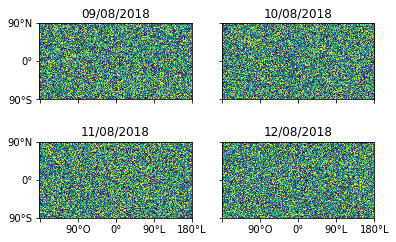

In [31]:
f, axs = plt.subplots(2,2, sharex=True, sharey=True)
axs = axs.flatten()
for ax, dado, tempo in  zip(axs, ncNovo.variables['tvar'][:], ncNovo.variables['time'][:]):
    # Plot em cada eixo
    ax.imshow(dado)
    
    #epoch to timestamp
    tit = pd.to_datetime(tempo, unit='d', origin='2018-01-01').strftime('%d/%m/%Y')
    ax.set_title(tit)
    
    # escolhendo ticks
    ax.set_yticks([0,90,180])
    ax.set_xticks([0,90,180,270,360])
    ax.set_yticklabels([u'90°N',u'0°',u'90°S'])
    ax.set_xticklabels([u' ',u'90°O',u'0°',u'90°L',u'180°L'])
    
    
